# GAIP  Project -  Melbourne Housing Price Prediction

### Team no. 2 

### Team members : Aditya Desai, Anirudh Srinivas Rohan Gorantla, Nithya Shikarpur, Priyansh, Parichay 

We will be following the Cross Industry Standard Process for Data Mining (CRISP-DM) principles 


## Business Understanding

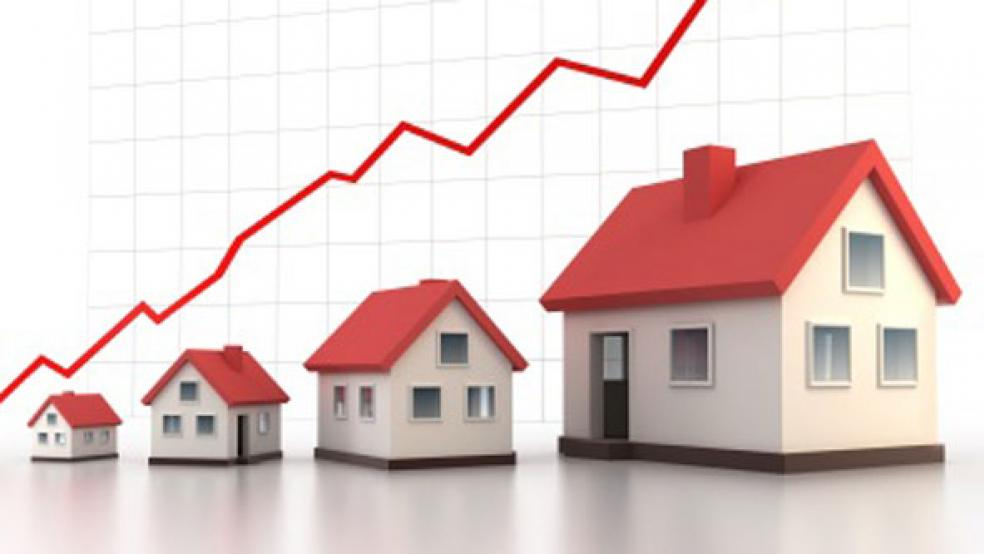

In [1]:
from IPython.display import Image
Image(filename='./assets/housing_prices.jpg')

## Data Understanding

### Data Source : https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/data

### Features:
Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

## Data Preparation

#### Importing Libraries for Data Analysis and Visualization

In [2]:
import pandas as pd  #for data handling and wrangling
import numpy as np
import matplotlib.pyplot as plt # for plotting and data visualization
import seaborn as sb # for plotting and data visualization
import sklearn as sk
import random
%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor

#### Loading the Dataset

In [4]:
train_data_file_path = './assets/Melbourne_housing.csv'
data = pd.read_csv(train_data_file_path)
print(data.head(3))

       Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford    68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   

        Date  Distance  Postcode      ...       Bathroom  Car  Landsize  \
0  3/09/2016       2.5      3067      ...            1.0  1.0     126.0   
1  3/12/2016       2.5      3067      ...            1.0  1.0     202.0   
2  4/02/2016       2.5      3067      ...            1.0  0.0     156.0   

   BuildingArea  YearBuilt         CouncilArea Lattitude  Longtitude  \
0           NaN        NaN  Yarra City Council  -37.8014    144.9958   
1           NaN        NaN  Yarra City Council  -37.7996    144.9984   
2          79.0     1900.0  Yarra City Council  -37.8079    144.9934   

              Regionname Propertycount  
0  Northern Metropolitan        4019.0  
1  Northern Metropolitan        4019.0 

#### Data Wrangling and Preprocessing

In [5]:
#Missing Values
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6367
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6552
Bathroom          6558
Car               6860
Landsize          9568
BuildingArea     17400
YearBuilt        15744
CouncilArea          2
Lattitude         6339
Longtitude        6339
Regionname           2
Propertycount        2
dtype: int64

In [6]:
# Percentage of missing values
data.isnull().sum()/len(data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.792107
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2         22.425300
Bathroom         22.445836
Car              23.479481
Landsize         32.748058
BuildingArea     59.554369
YearBuilt        53.886436
CouncilArea       0.006845
Lattitude        21.696273
Longtitude       21.696273
Regionname        0.006845
Propertycount     0.006845
dtype: float64

In [7]:
# Remove rows missing data
data = data.dropna()

In [8]:
# present age of the building
data.info()
data['Age'] = 2018 - data['YearBuilt']
data.drop('YearBuilt',axis = 1)
data.to_csv('nona.csv')
#information of dataset after droping not available data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7696 entries, 2 to 29212
Data columns (total 21 columns):
Suburb           7696 non-null object
Address          7696 non-null object
Rooms            7696 non-null int64
Type             7696 non-null object
Price            7696 non-null float64
Method           7696 non-null object
SellerG          7696 non-null object
Date             7696 non-null object
Distance         7696 non-null float64
Postcode         7696 non-null int64
Bedroom2         7696 non-null float64
Bathroom         7696 non-null float64
Car              7696 non-null float64
Landsize         7696 non-null float64
BuildingArea     7696 non-null float64
YearBuilt        7696 non-null float64
CouncilArea      7696 non-null object
Lattitude        7696 non-null float64
Longtitude       7696 non-null float64
Regionname       7696 non-null object
Propertycount    7696 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 1.3+ MB


In [9]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Age'],
      dtype='object')

In [10]:
#Dropping Columns that are not used in data analysis
#data_new=data.drop(['Bedroom2','Method','Date','SellerG','Postcode','CouncilArea','Propertycount'],axis=1)
cols_to_keep  = [ 'Rooms', 'Distance', 'Landsize',  'Bathroom', 'Car',
       'BuildingArea',   'Lattitude',
       'Longtitude', 'Age','Price']
data_new = data[cols_to_keep]
print(data_new.head(3))

   Rooms  Distance  Landsize  Bathroom  Car  BuildingArea  Lattitude  \
2      2       2.5     156.0       1.0  0.0          79.0   -37.8079   
4      3       2.5     134.0       2.0  0.0         150.0   -37.8093   
6      4       2.5     120.0       1.0  2.0         142.0   -37.8072   

   Longtitude    Age      Price  
2    144.9934  118.0  1035000.0  
4    144.9944  118.0  1465000.0  
6    144.9941    4.0  1600000.0  


In [11]:
data_new.describe()

,Rooms,Distance,Landsize,Bathroom,Car,BuildingArea,Lattitude,Longtitude,Age,Price
count,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7.696000e+03
mean,3.041710,10.660356,509.856939,1.620062,1.646440,146.309813,-37.806288,144.991886,53.034433,1.087496e+06
std,0.976635,6.405592,1013.337512,0.723419,0.961437,89.697001,0.085010,0.112249,37.310265,6.800440e+05
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-38.174360,144.423790,0.000000,1.310000e+05
25%,2.000000,6.300000,188.000000,1.000000,1.000000,96.000000,-37.857400,144.923090,18.000000,6.350000e+05
50%,3.000000,9.700000,452.000000,2.000000,2.000000,129.000000,-37.800530,144.997805,48.000000,8.950000e+05
75%,4.000000,13.600000,650.000000,2.000000,2.000000,176.000000,-37.752800,145.060900,78.000000,1.340250e+06
max,12.000000,47.400000,40469.000000,9.000000,10.000000,3112.000000,-37.407200,145.526350,822.000000,9.000000e+06


In [12]:
# Add age variable based on Year Built
#data_new['Age'] = 2018 - data_new['YearBuilt']
#print(data_new.head())

In [13]:
data_new.to_csv("processed.csv")

In [14]:
print(data_new['Age'].quantile(q=0.98))
print(data_new['BuildingArea'].quantile(q=0.98))
print(data_new['Landsize'].quantile(q=0.98))

128.0
360.09999999999945
1541.4999999999918


#### Outliers

In [15]:
#If we observe the description we can see that there are zeroes in landsize
# and building area which will have an impact on the results.
data_new=data_new[data_new['BuildingArea']!=0]
data_new=data_new[data_new['Landsize']!=0]
data_new=data_new[data_new['Age']<=128]
data_new=data_new[data_new['BuildingArea']<=360]
data_new=data_new[data_new['BuildingArea']<=1541]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 2 to 29212
Data columns (total 10 columns):
Rooms           6405 non-null int64
Distance        6405 non-null float64
Landsize        6405 non-null float64
Bathroom        6405 non-null float64
Car             6405 non-null float64
BuildingArea    6405 non-null float64
Lattitude       6405 non-null float64
Longtitude      6405 non-null float64
Age             6405 non-null float64
Price           6405 non-null float64
dtypes: float64(9), int64(1)
memory usage: 550.4 KB


# Modelling

In [16]:
print(data_new.head())

    Rooms  Distance  Landsize  Bathroom  Car  BuildingArea  Lattitude  \
2       2       2.5     156.0       1.0  0.0          79.0   -37.8079   
4       3       2.5     134.0       2.0  0.0         150.0   -37.8093   
6       4       2.5     120.0       1.0  2.0         142.0   -37.8072   
11      3       2.5     245.0       2.0  0.0         210.0   -37.8024   
14      2       2.5     256.0       1.0  2.0         107.0   -37.8060   

    Longtitude    Age      Price  
2     144.9934  118.0  1035000.0  
4     144.9944  118.0  1465000.0  
6     144.9941    4.0  1600000.0  
11    144.9993  108.0  1876000.0  
14    144.9954  128.0  1636000.0  


In [17]:
decisive_columns = data_new.iloc[:,0:9]
print(decisive_columns.describe())

             Rooms     Distance      Landsize     Bathroom          Car  \
count  6405.000000  6405.000000   6405.000000  6405.000000  6405.000000   
mean      3.175176    11.387307    582.485558     1.645902     1.711007   
std       0.881967     6.510543   1065.457079     0.690448     0.976942   
min       1.000000     0.000000      1.000000     1.000000     0.000000   
25%       3.000000     7.000000    277.000000     1.000000     1.000000   
50%       3.000000    10.500000    531.000000     2.000000     2.000000   
75%       4.000000    13.900000    669.000000     2.000000     2.000000   
max      12.000000    47.400000  40469.000000     8.000000    10.000000   

       BuildingArea    Lattitude   Longtitude          Age  
count   6405.000000  6405.000000  6405.000000  6405.000000  
mean     148.977241   -37.803271   144.992369    54.311788  
std       62.441681     0.089191     0.119359    35.682960  
min        1.000000   -38.174360   144.423790     0.000000  
25%      106.000000

In [18]:
X = decisive_columns
y = data_new.Price

#### Spliiting the dataset into Train and Test

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,train_y,test_y = train_test_split(X,y,test_size=0.2)

### Linear Regression

We are using the Supervised Learning regressor models because our data is a continous labelled data where our prices are the labels and features are the specifications of the houses

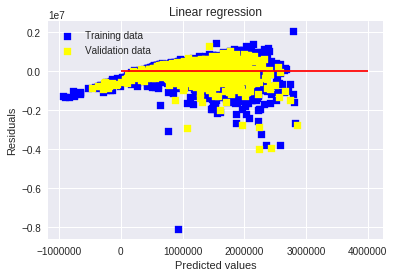

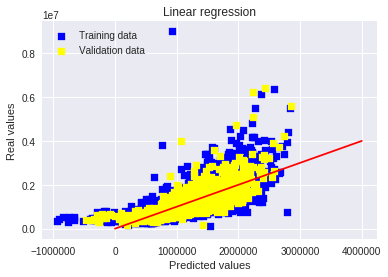

In [20]:
# Linear Regression
lr = linear_model.LinearRegression()
lr.fit(X_train, train_y)

# Look at predictions on training and validation set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - test_y, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 4e6, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, test_y, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 4e6], [10.5, 4e6], c = "red")
plt.show()

In [21]:
reg = linear_model.LinearRegression()
reg.fit(X_train, train_y)
Y_pred = reg.predict(X_test)

In [22]:
print(Y_pred)

[ 1031500.8036961   1132164.13790777   937250.22487587 ...,
  1118195.85504779   997606.53463209  1165631.72981054]


In [23]:
reg.score(X_test,test_y)

0.6142704997291818

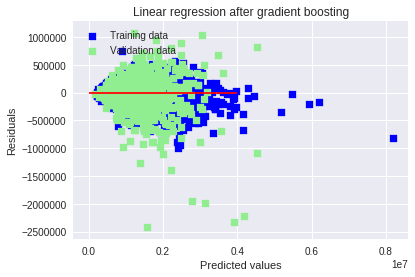

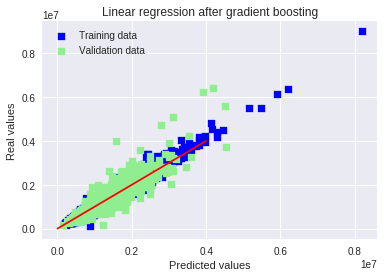

In [24]:
#Gradient Descent
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.05, loss = 'ls')
clf.fit(X_train, train_y)

# Look at predictions on training and validation set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - test_y, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression after gradient boosting")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 4e6, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, test_y, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression after gradient boosting")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 4e6], [10.5, 4e6], c = "red")
plt.show()

In [25]:
# Calculated R Squared
clf.score(X_test,test_y)

0.83418053923171454

In [26]:
# Predicting test set results
y_pred = reg.predict(X_test)
print(y_pred)

[ 1031500.8036961   1132164.13790777   937250.22487587 ...,
  1118195.85504779   997606.53463209  1165631.72981054]


In [27]:
#Cofficients
cdf = pd.DataFrame(data= reg.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,5.044246e+04
Distance,-3.242052e+04
Landsize,1.815239e+01
Bathroom,1.035321e+05
Car,3.809095e+04
BuildingArea,4.462466e+03
Lattitude,-1.213102e+06
Longtitude,7.109518e+05
Age,4.823864e+03


## Decision Trees

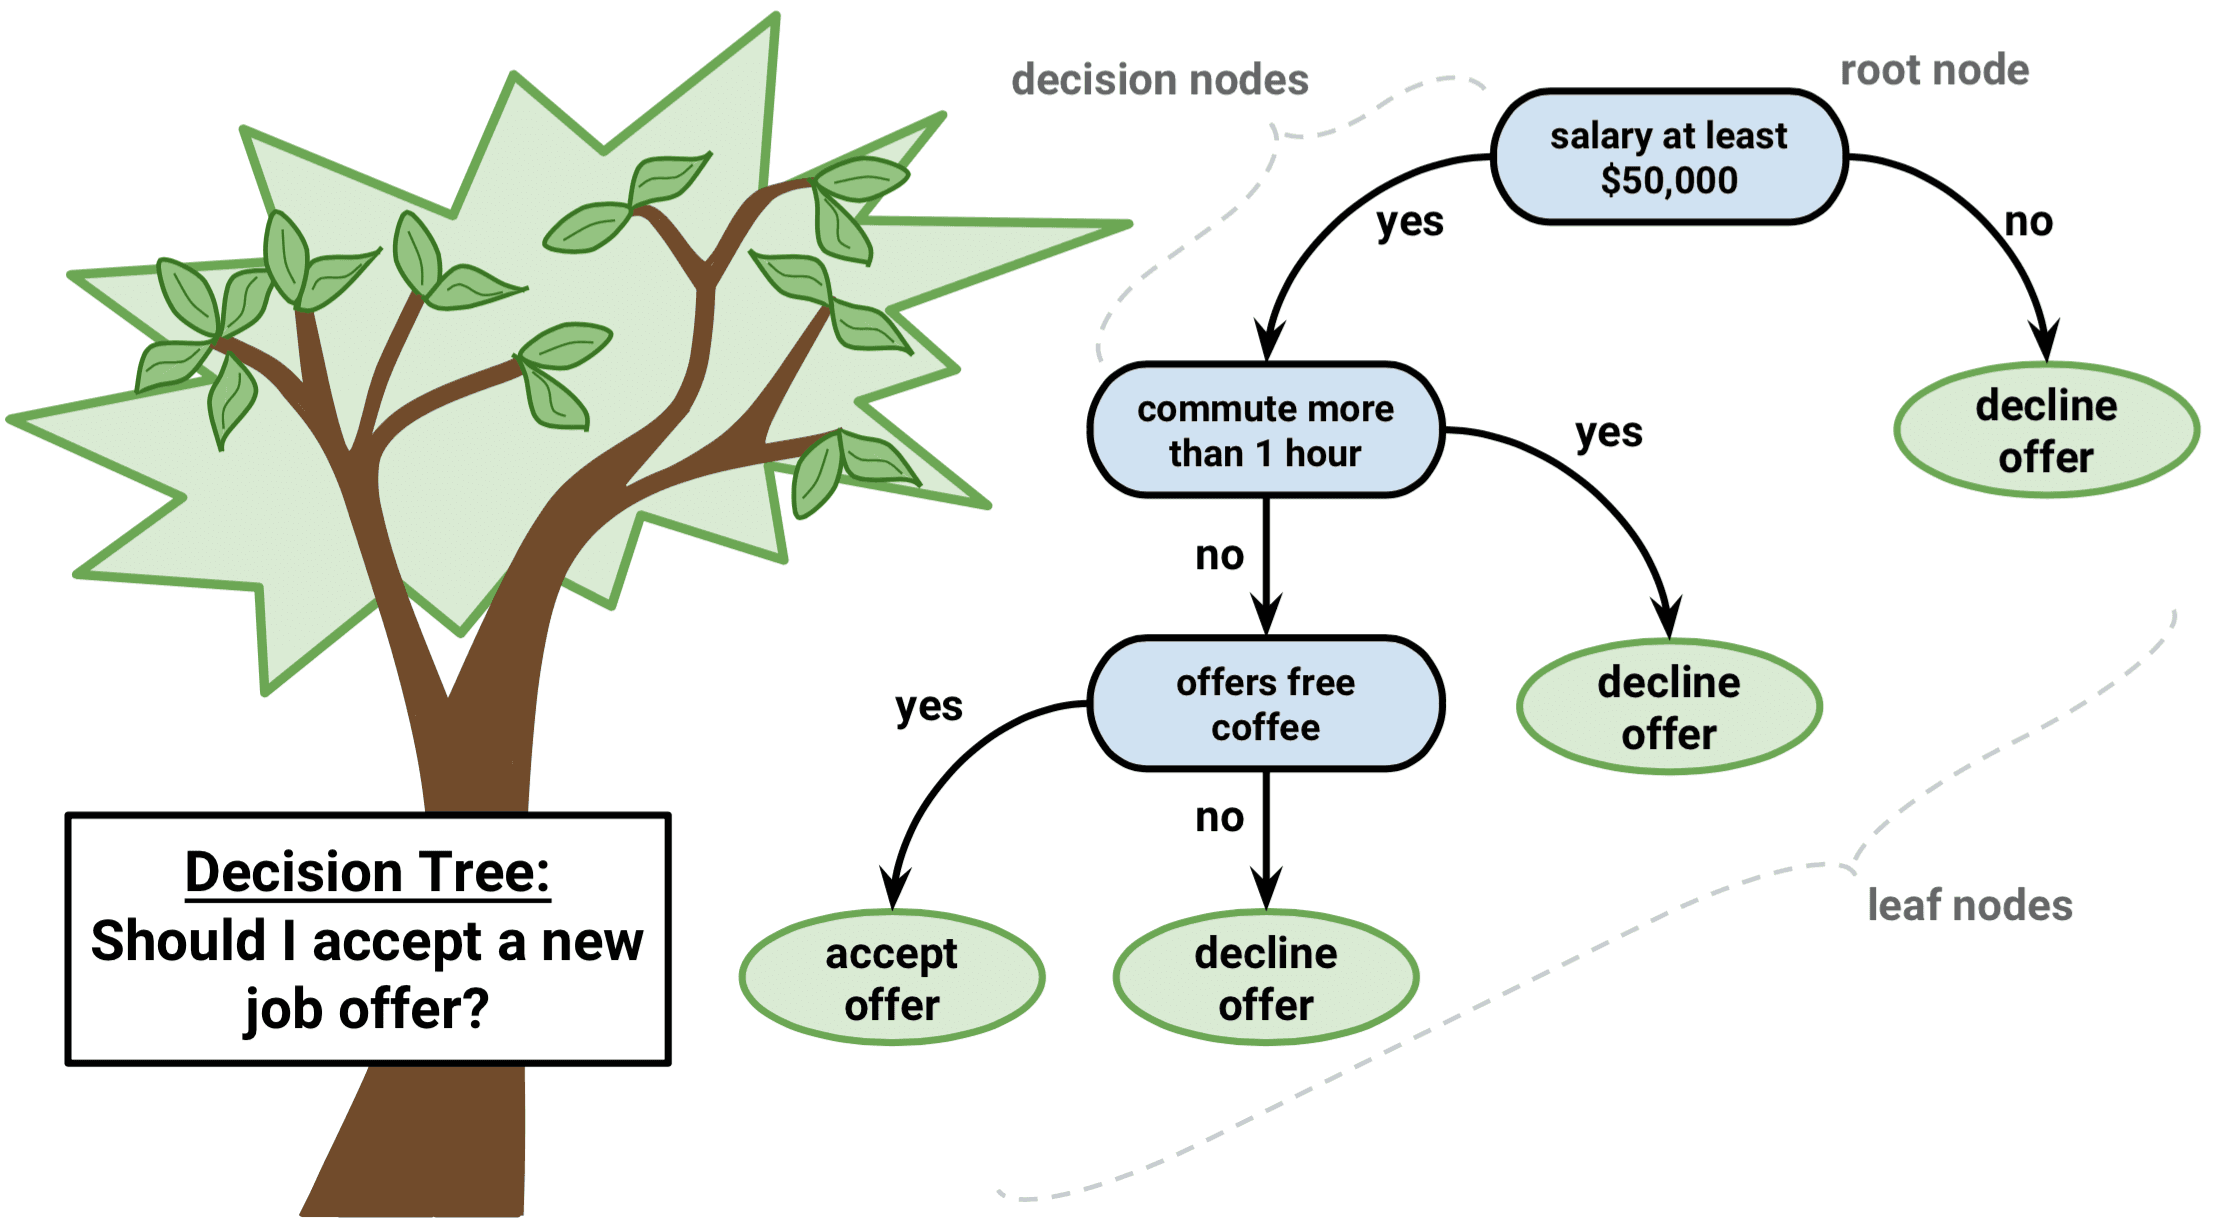

In [28]:
Image(filename='./assets/decision_tree.png')

In [29]:
random.seed(10)
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, train_y)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_test, test_y) 
print(Y_pred)
acc_decision_tree

[  921000.  1080000.  1170000. ...,  1420000.   813000.   850000.]


0.67547916125758101

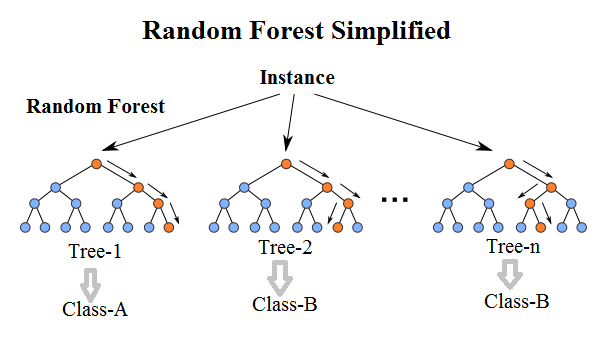

In [30]:
Image(filename='./assets/random_forest.png')

In [31]:
random.seed(10)
random_forests = RandomForestRegressor()
random_forests.fit(X_train, train_y)
Y_pred = random_forests.predict(X_test)
acc_random_forests = random_forests.score(X_test, test_y) 
print(Y_pred)
acc_random_forests

[  966100.  1007800.   876000. ...,   999950.   923480.  1357200.]


0.78066737262547892

Multilayer Perceptron

In [32]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/shadowranger/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [33]:
X_train.shape

(5124, 9)

In [34]:
model = Sequential()

hidden_layer = Dense(1000,input_shape = (9,),activation='tanh')
model.add(hidden_layer)

output_layer = Dense(1,activation='tanh')
model.add(output_layer)

model.compile(metrics= ['accuracy'], optimizer='adam', loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              10000     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 11,001
Trainable params: 11,001
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,train_y,epochs=10,batch_size=200)

Epoch 1/10
5124/5124 [==============================] - 1s 179us/step - loss: 1635533530974.5261 - acc: 0.0000e+00
Epoch 2/10
5124/5124 [==============================] - 0s 16us/step - loss: 1635533544071.4941 - acc: 0.0000e+00
Epoch 3/10
5124/5124 [==============================] - 0s 13us/step - loss: 1635533445230.3137 - acc: 0.0000e+00
Epoch 4/10
5124/5124 [==============================] - 0s 13us/step - loss: 1635533448402.2356 - acc: 0.0000e+00
Epoch 5/10
5124/5124 [==============================] - 0s 28us/step - loss: 1635533444821.0334 - acc: 0.0000e+00
Epoch 6/10
5124/5124 [==============================] - 0s 18us/step - loss: 1635533456792.4810 - acc: 0.0000e+00
Epoch 7/10
5124/5124 [==============================] - 0s 27us/step - loss: 1635533491478.9822 - acc: 0.0000e+00
Epoch 8/10
5124/5124 [==============================] - 0s 29us/step - loss: 1635533471628.8899 - acc: 0.0000e+00: 0s - loss: 1665056031980.3076 - acc: 0.0000e+
Epoch 9/10
5124/5124 [==================

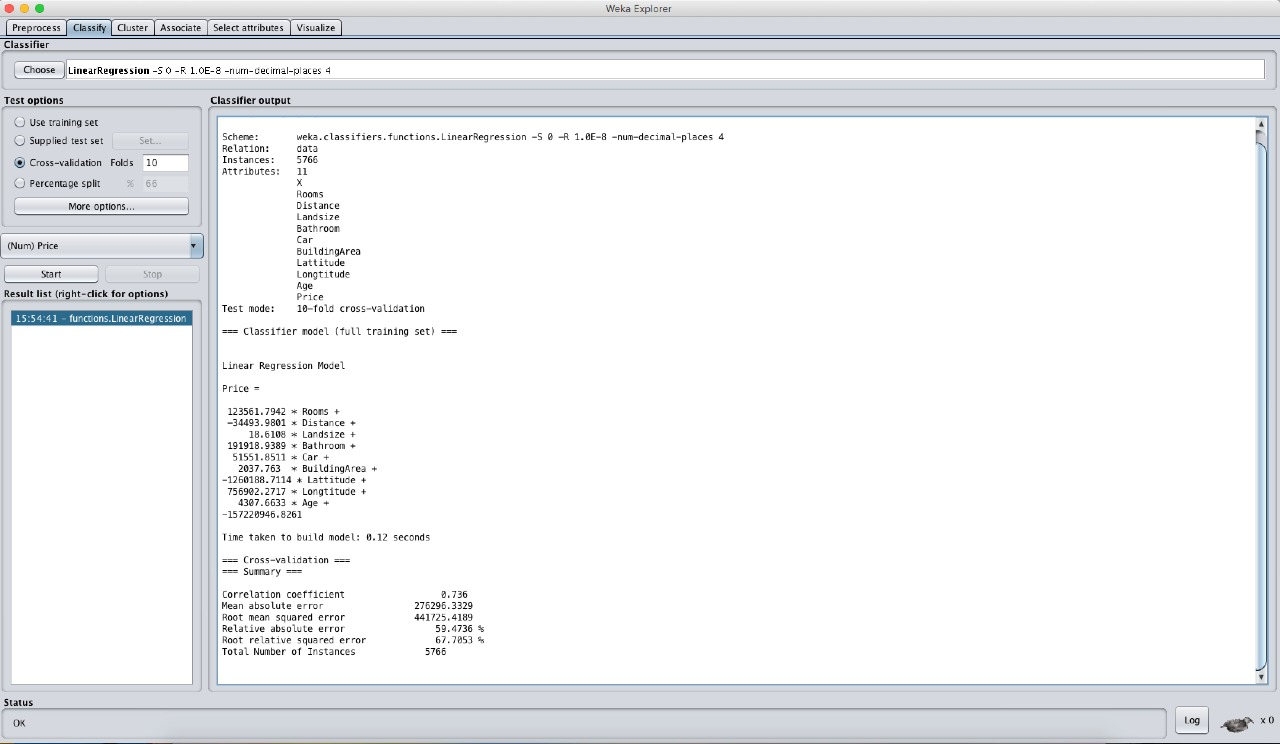

In [36]:
Image(filename='./assets/weka1.jpeg')

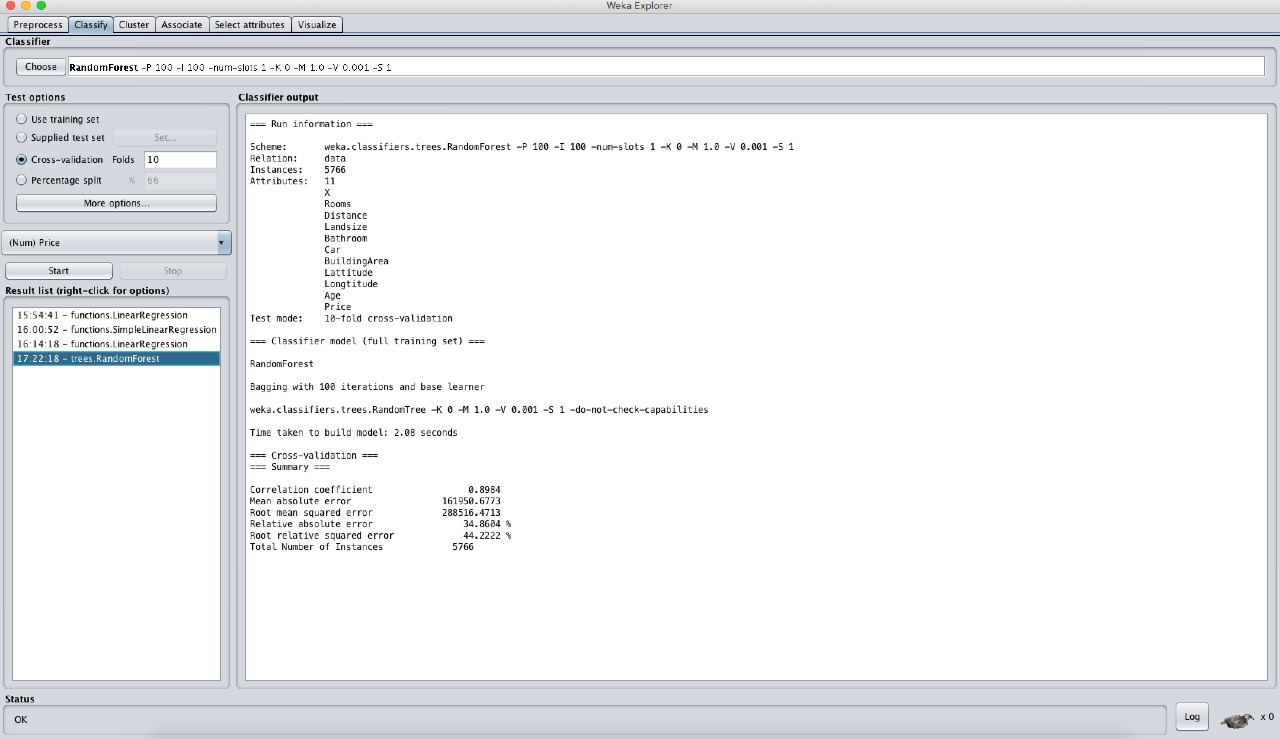

In [37]:
Image(filename='./assets/weka2.jpeg')

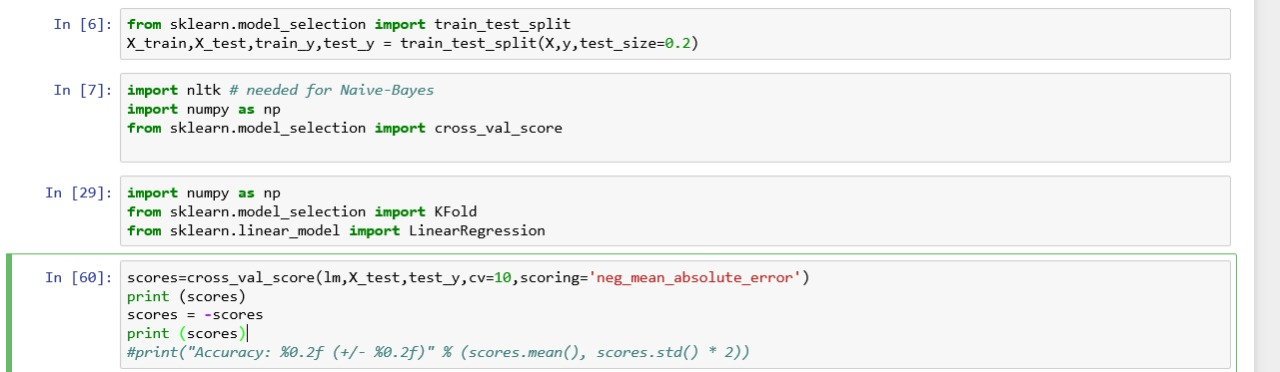

In [38]:
Image(filename='./assets/kfold1.jpeg')

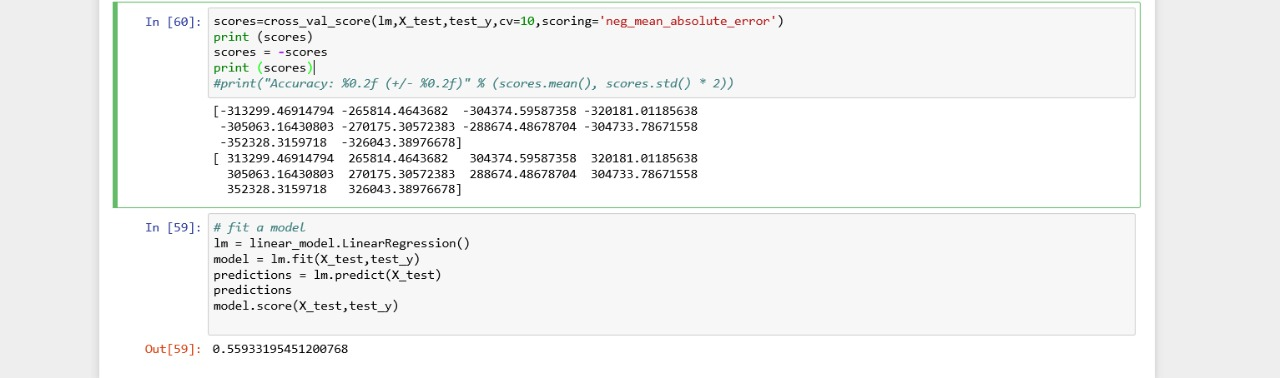

In [39]:
Image(filename='./assets/kfold2.jpeg')

### Evaluation

#### Interpretation based on Latitude and Longitude

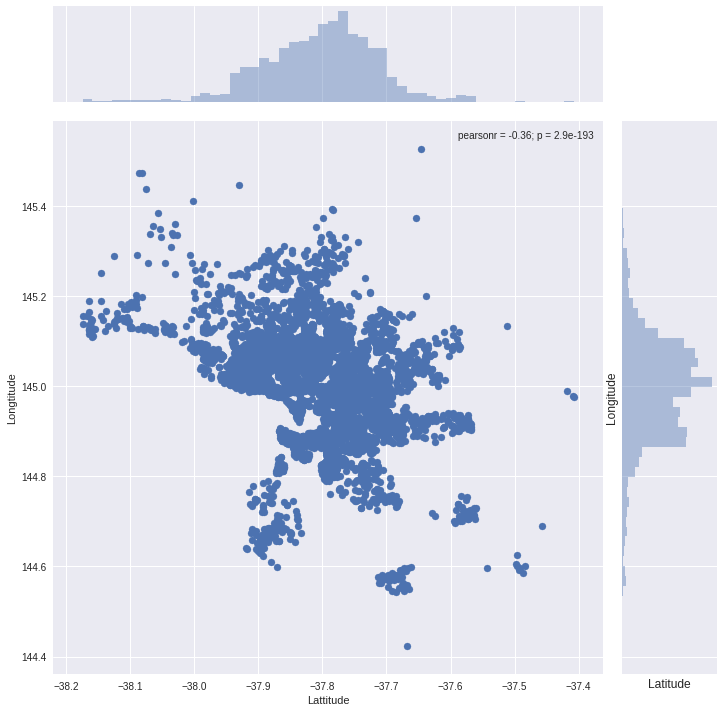

In [40]:
plt.figure(figsize=(10,10))
sb.jointplot(x=data_new.Lattitude, y=data_new.Longtitude, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

 For latitude between -37.6 and -38.0 there are many houses , which would mean that it’s an ideal residential 
 location.But when we talk about longitude we can see that concentration is high between 144.8 to 145.

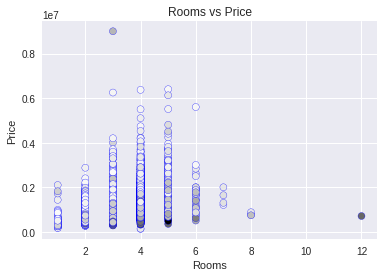

In [41]:
plt.scatter(x = 'Rooms', y = 'Price', data = data_new, edgecolor = 'b',c='Distance')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Rooms vs Price')

Given number of rooms between 3-5, there seems to be houses in all price ranges. As the number of rooms increases we can find higher price range houses. For 1-2 room houses there are lower price range houses


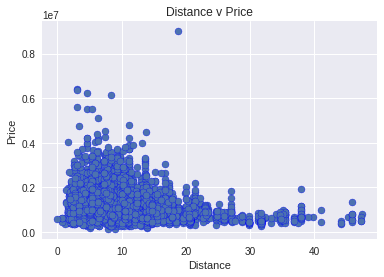

In [42]:
plt.scatter(x = 'Distance', y = 'Price', data = data_new, edgecolor = 'b')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Distance v Price')

Closer to CBD, there are a number of houses with varying price range
Farther away, the number reduces drastically and the price too

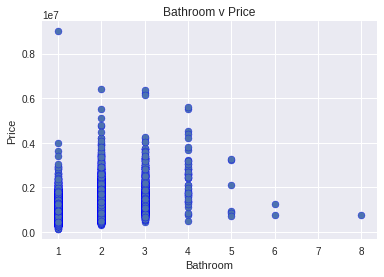

In [43]:
plt.scatter(x = 'Bathroom', y = 'Price', data = data_new, edgecolor = 'b')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.title('Bathroom v Price')

As the number of bathrooms becomes more than 5, the number of houses decreases drastically. Initially, the price range increases as the number of bathrooms increases.


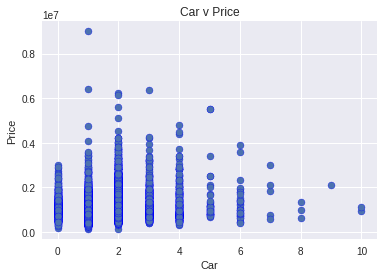

In [44]:
plt.scatter(x = 'Car', y = 'Price', data = data_new, edgecolor = 'b')
plt.xlabel('Car')
plt.ylabel('Price')
plt.title('Car v Price')

People with 2 or 4 cars have been seen to be buying the costliest of houses As people have more number of houses the price decreases

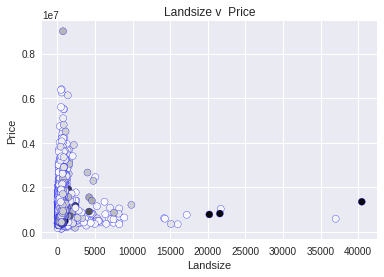

In [45]:
plt.scatter(x = 'Landsize', y = 'Price', c='Distance',data = data_new, edgecolor = 'b')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.title('Landsize v  Price')

Lower landsize have greater price range

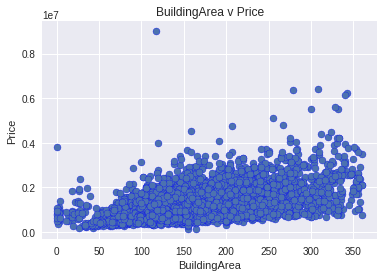

In [46]:
plt.scatter(x = 'BuildingArea', y = 'Price', data = data_new, edgecolor = 'b')
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.title('BuildingArea v Price')

As building area increases we can see a slight shift of the range of the houses available

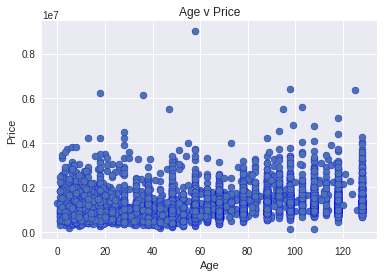

In [47]:
plt.scatter(x = 'Age', y = 'Price', data = data_new, edgecolor = 'b')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Age v Price')


More number of newly built houses available Price range is approximately the same for all ages of houses


#### Correlation

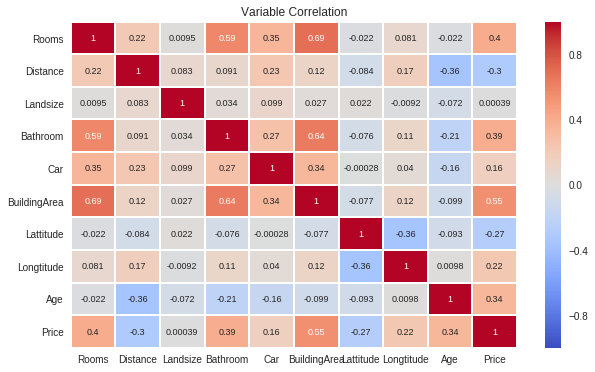

In [48]:
plt.figure(figsize=(10,6))
sb.heatmap(data_new.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

### Deployment

For the deployment phase , making a report which shows all the data concisely would suffice.

### Further work

Collect more features, analyse them and incorporate them in the model
 